In [1]:
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.12.5 | packaged by Anaconda, Inc. | (main, Sep 12 2024, 18:18:29) [MSC v.1929 64 bit (AMD64)]
PyTorch version 2.4.1
Torchvision version 0.19.1
Numpy version 1.26.4
Pandas version 2.2.2


In [3]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes
    


In [4]:

data_dir = 'D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/train'
dataset = PlayingCardDataset(data_dir=data_dir)


print(len(dataset))
print(dataset[0])

image, label = dataset[0]
print(image)
print(label)

7624
(<PIL.Image.Image image mode=RGB size=224x224 at 0x17DF58DBBF0>, 0)
<PIL.Image.Image image mode=RGB size=224x224 at 0x17DE5EA9700>
0


In [5]:

target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [6]:
transform = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.ToTensor(),
])

## *Model Creation* - VGG16

In [7]:
class VGG16CardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(VGG16CardClassifier, self).__init__()
        
        # Load VGG16 pre-trained model
        self.base_model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
        
        # Remove the classifier part of VGG16 and keep only the feature extractor
        # self.features = self.base_model.features
        
        # Define the output size of VGG16's final feature map (flattened)
        # vgg16_out_size = 512 * 7 * 7  # VGG16 outputs a 512 x 7 x 7 tensor for 224x224 images
        
        # Replace VGG16's classifier with a custom classifier for our task
        # for param in self.base_model.parameters():
        #     param.requires_grad = False
        # Replace classifier layers
        self.base_model.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Pass input through VGG16 features
        # x = self.features(x)
        # print(x.shape)
        # x = x.view(x.size(0), -1)
        # Flatten and pass through the custom classifier
        x = self.base_model(x)
        return x


In [8]:
model = VGG16CardClassifier(num_classes=53)
print(str(model)[:500])

VGG16CardClassifier(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 


In [9]:
for name, param in model.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


base_model.features.0.weight: requires_grad=True
base_model.features.0.bias: requires_grad=True
base_model.features.2.weight: requires_grad=True
base_model.features.2.bias: requires_grad=True
base_model.features.5.weight: requires_grad=True
base_model.features.5.bias: requires_grad=True
base_model.features.7.weight: requires_grad=True
base_model.features.7.bias: requires_grad=True
base_model.features.10.weight: requires_grad=True
base_model.features.10.bias: requires_grad=True
base_model.features.12.weight: requires_grad=True
base_model.features.12.bias: requires_grad=True
base_model.features.14.weight: requires_grad=True
base_model.features.14.bias: requires_grad=True
base_model.features.17.weight: requires_grad=True
base_model.features.17.bias: requires_grad=True
base_model.features.19.weight: requires_grad=True
base_model.features.19.bias: requires_grad=True
base_model.features.21.weight: requires_grad=True
base_model.features.21.bias: requires_grad=True
base_model.features.24.weigh

In [10]:
train_folder = 'D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/train'
test_folder = 'D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/test'
valid_folder = 'D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/valid'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)
valid_dataset = PlayingCardDataset(valid_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [11]:
for x, y in train_loader:
    print(x.shape)
    print(y)
    break

torch.Size([32, 3, 224, 224])
tensor([50, 33, 48, 37, 32, 31,  5,  9, 12,  0, 26, 16, 29, 15, 12, 37, 36, 25,
         3, 50, 20, 27, 17, 51, 15, 48, 26, 15, 18, 48, 52, 16])


In [12]:
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = VGG16CardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
        
        val_loss = running_loss / len(valid_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

    
    

Validation loop: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Epoch 1/5 - Train loss: 3.9864923546221673, Validation loss: 3.974396428522074


Validation loop: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


Epoch 2/5 - Train loss: 3.967573090089956, Validation loss: 3.9744680872503317


Validation loop: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Epoch 3/5 - Train loss: 3.9658270985482247, Validation loss: 3.9747236755658997


Validation loop: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Epoch 4/5 - Train loss: 3.9655806885686276, Validation loss: 3.9765775599569646


Validation loop: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

Epoch 5/5 - Train loss: 3.965268245148634, Validation loss: 3.975911493121453


In [13]:
train_loss

3.965268245148634

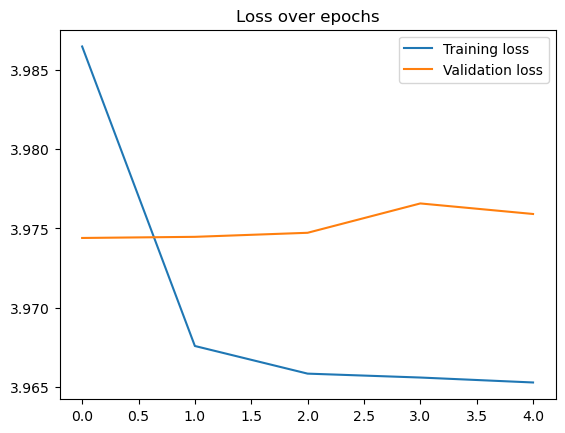

In [14]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

## Evaluate the results

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()




In [27]:
test_image = "D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/test/nine of hearts/4.jpg"

original_image, image_tensor = preprocess_image(test_image, transform)
prob = predict(model, image_tensor, device)

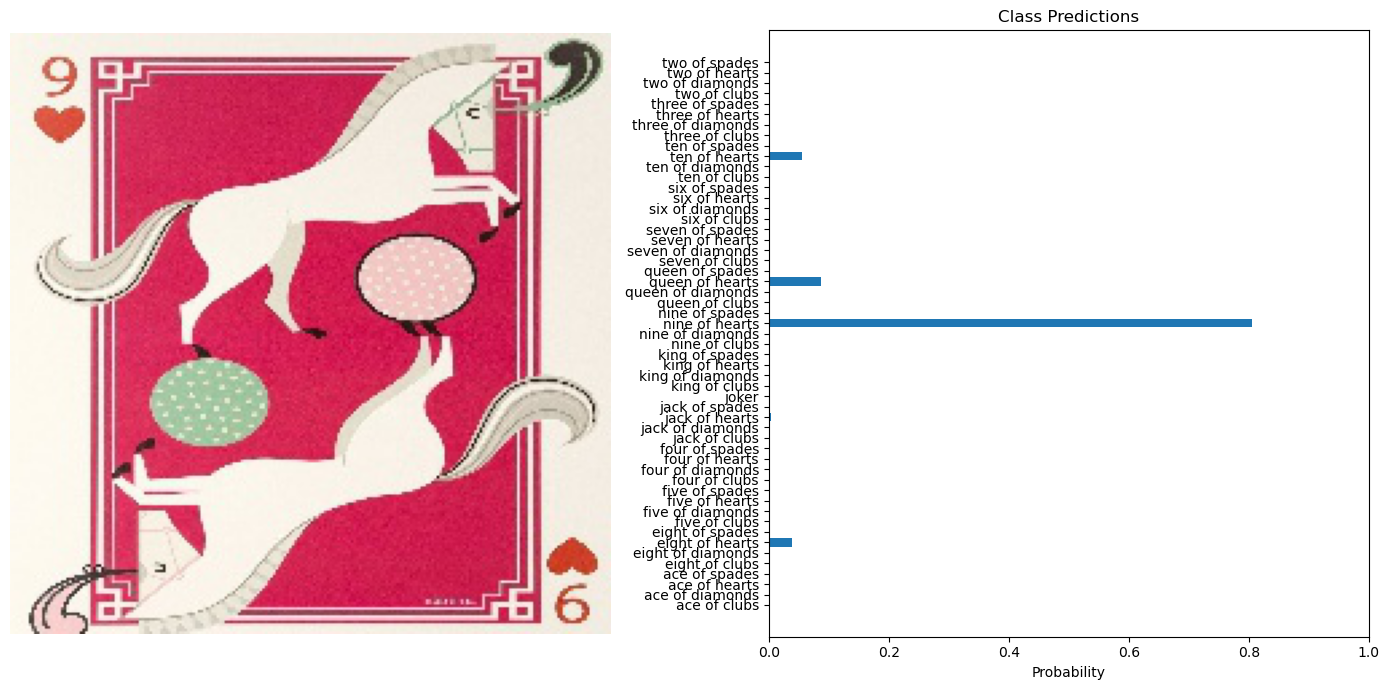

In [28]:
class_names = dataset.classes

visualize_predictions(original_image, prob, class_names)
# print(class_names)

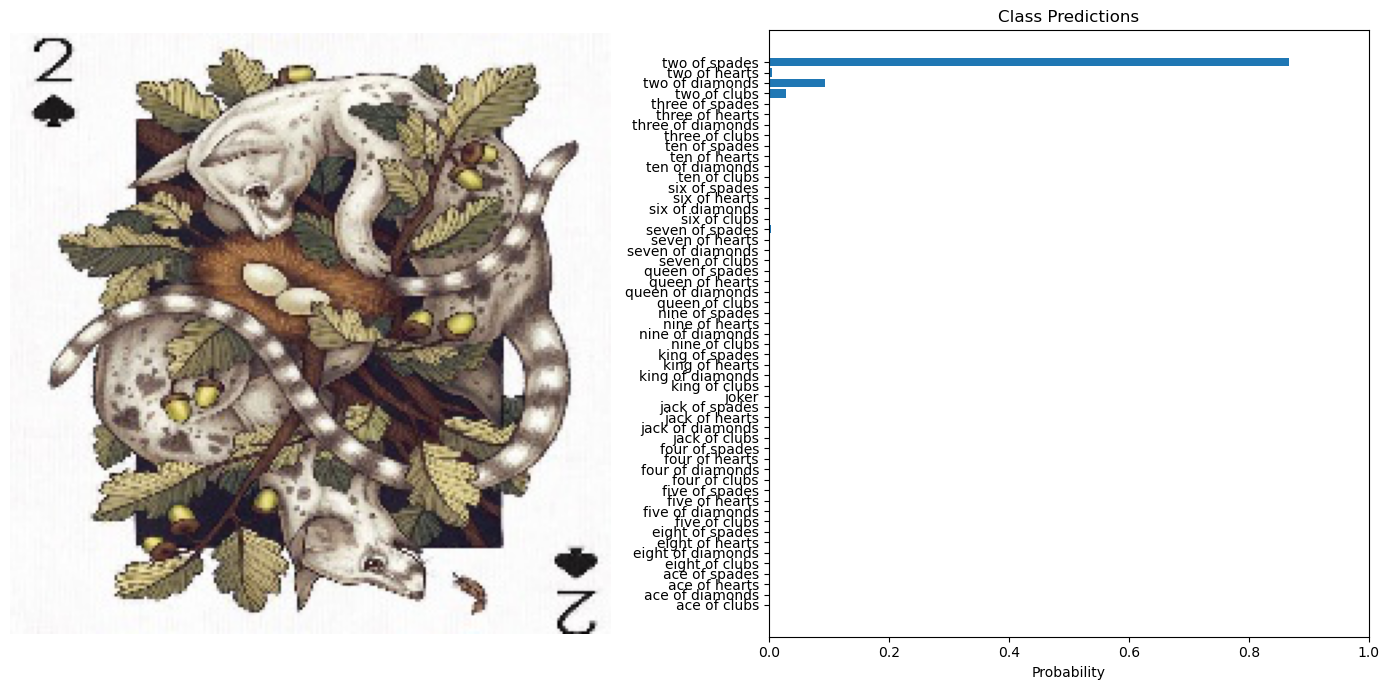

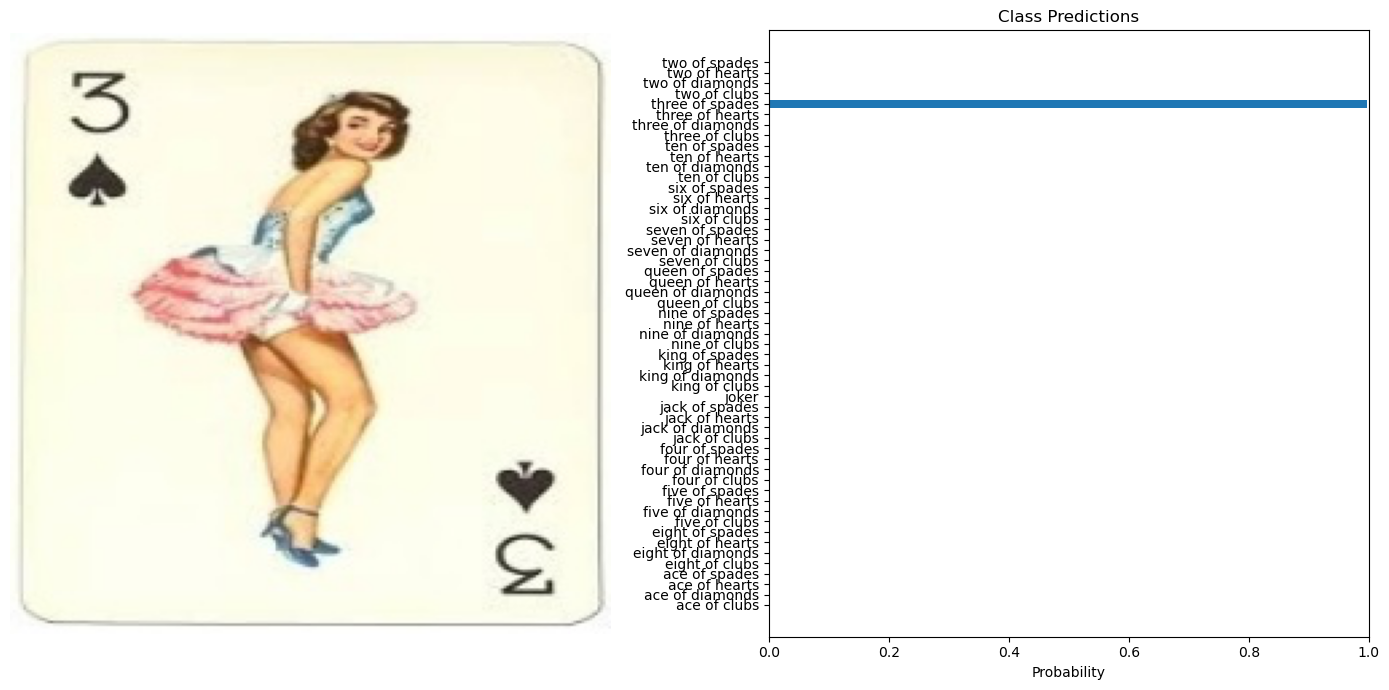

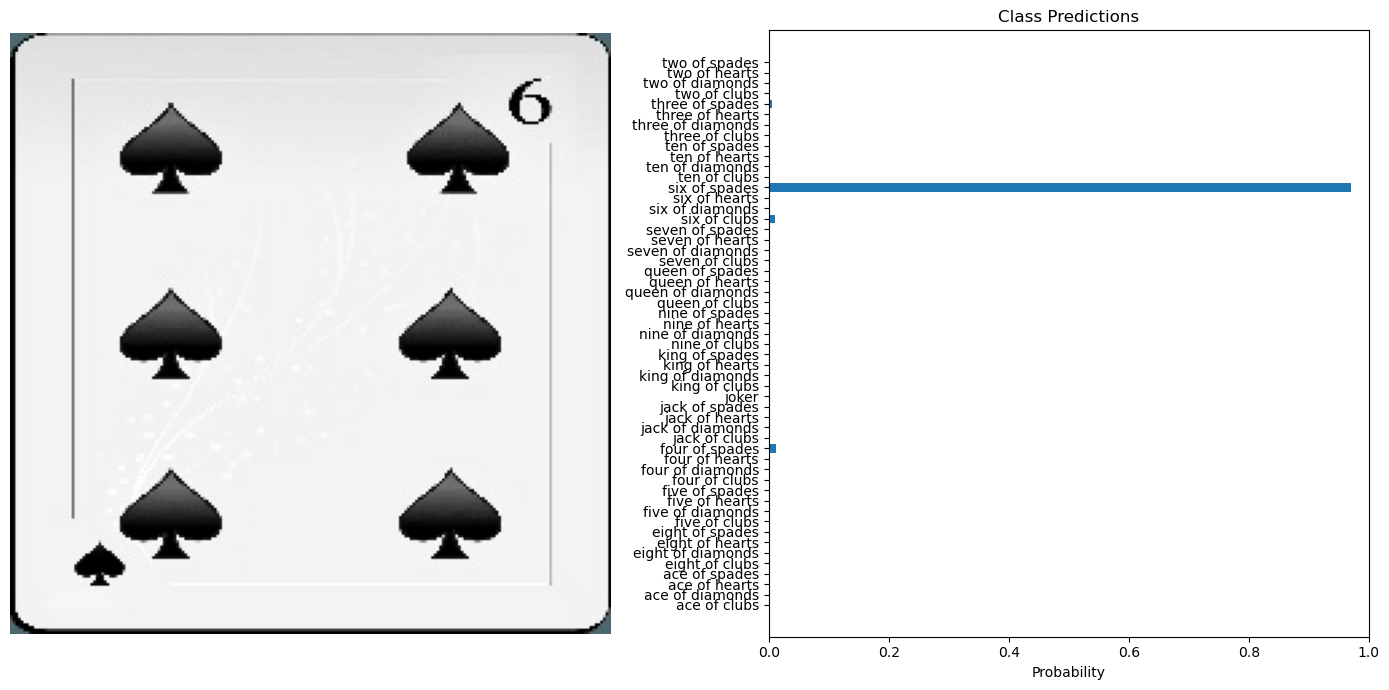

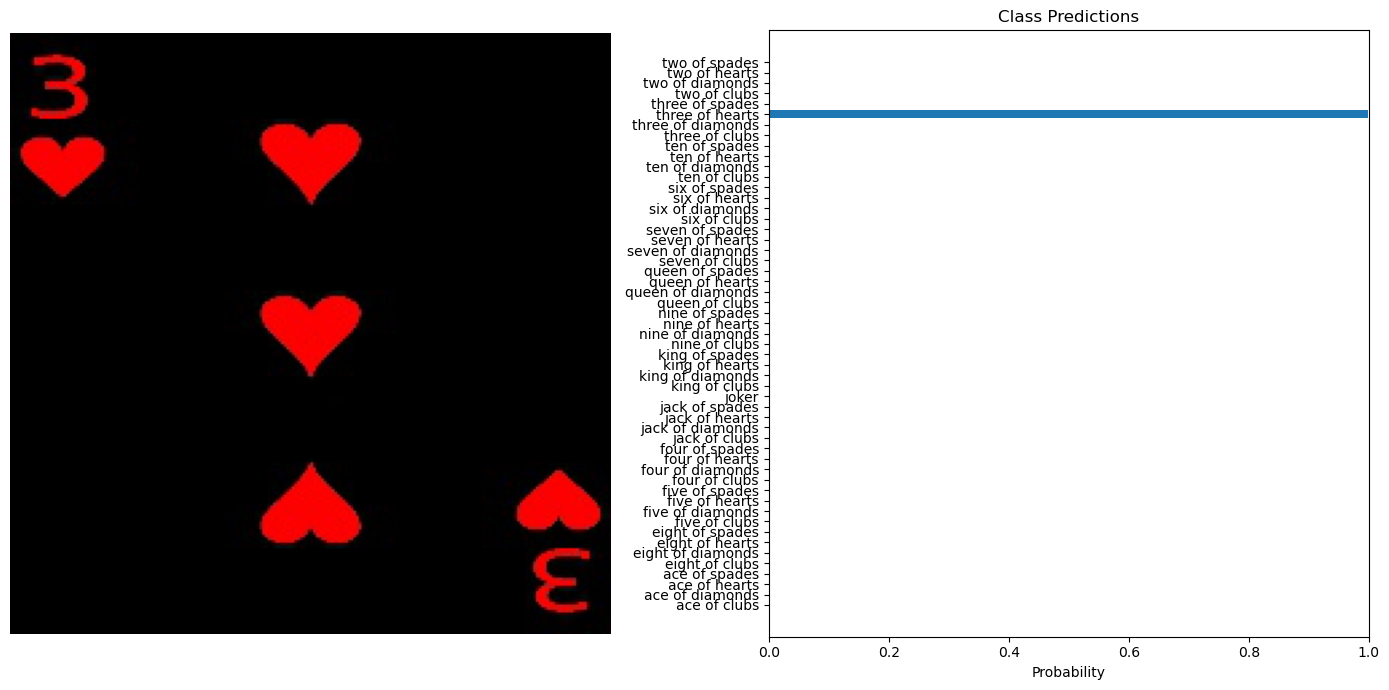

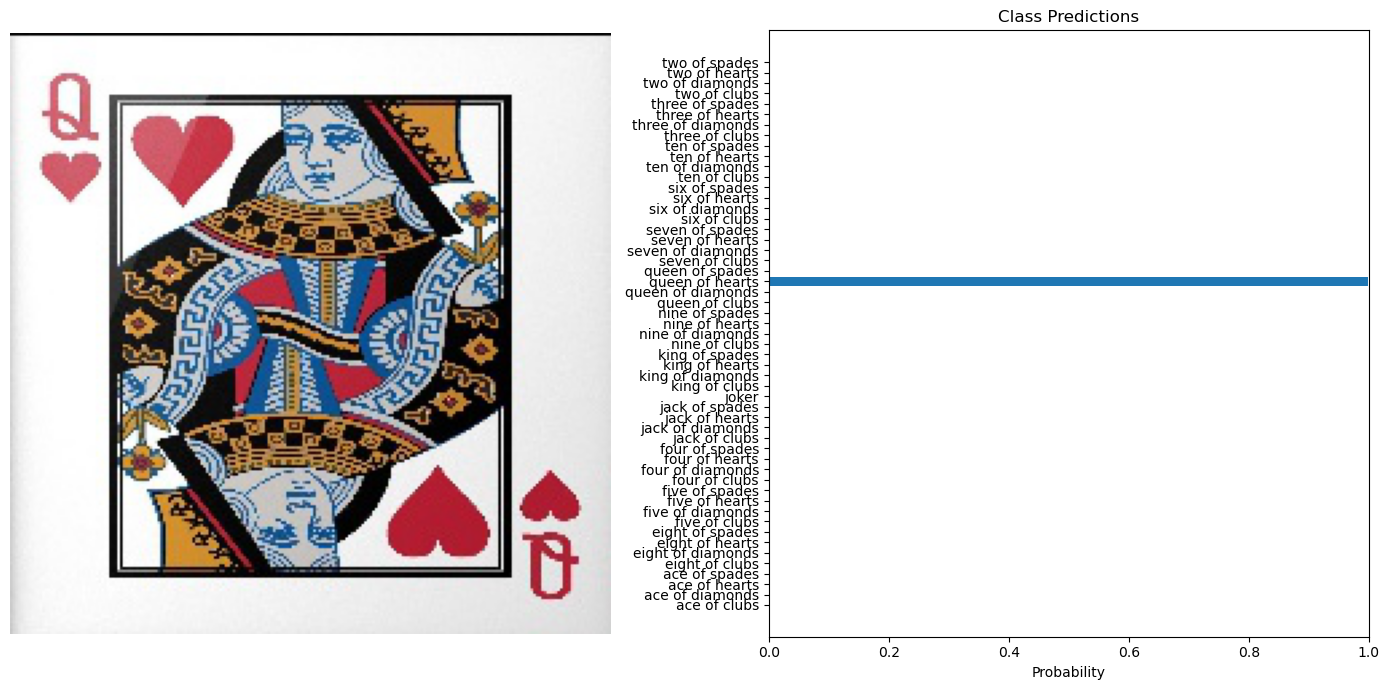

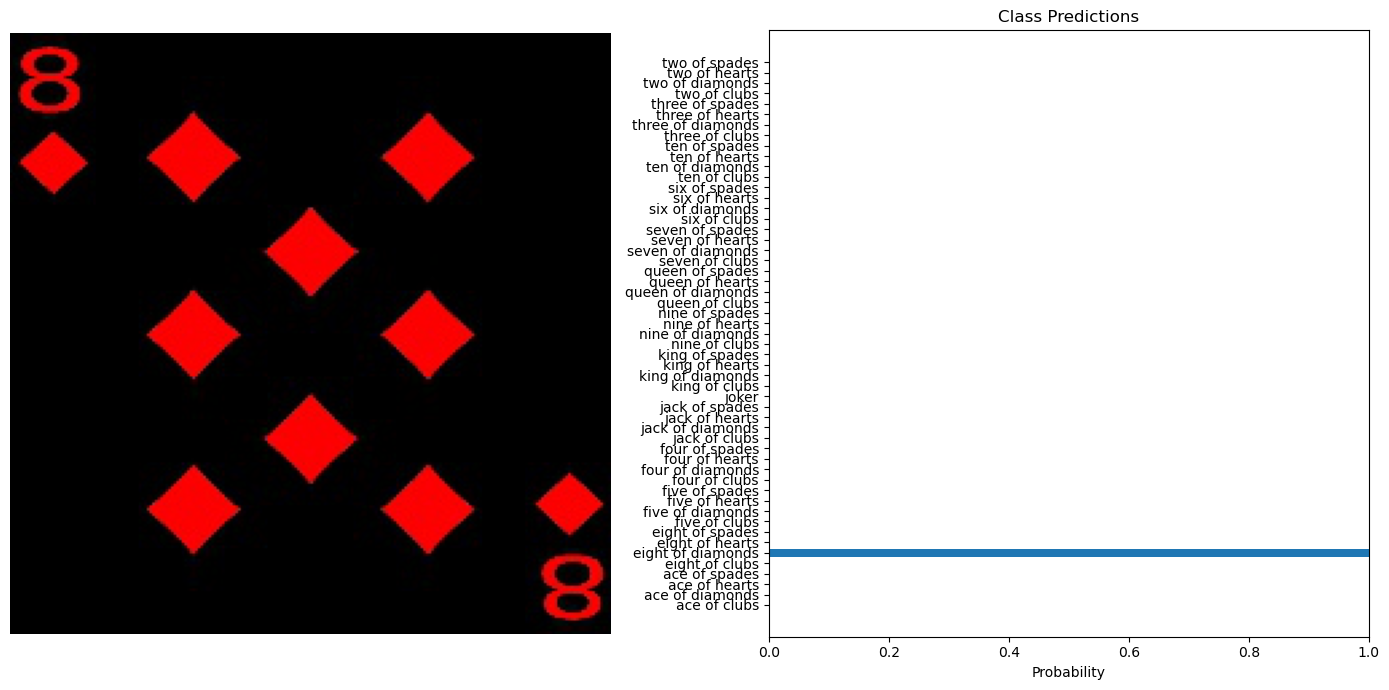

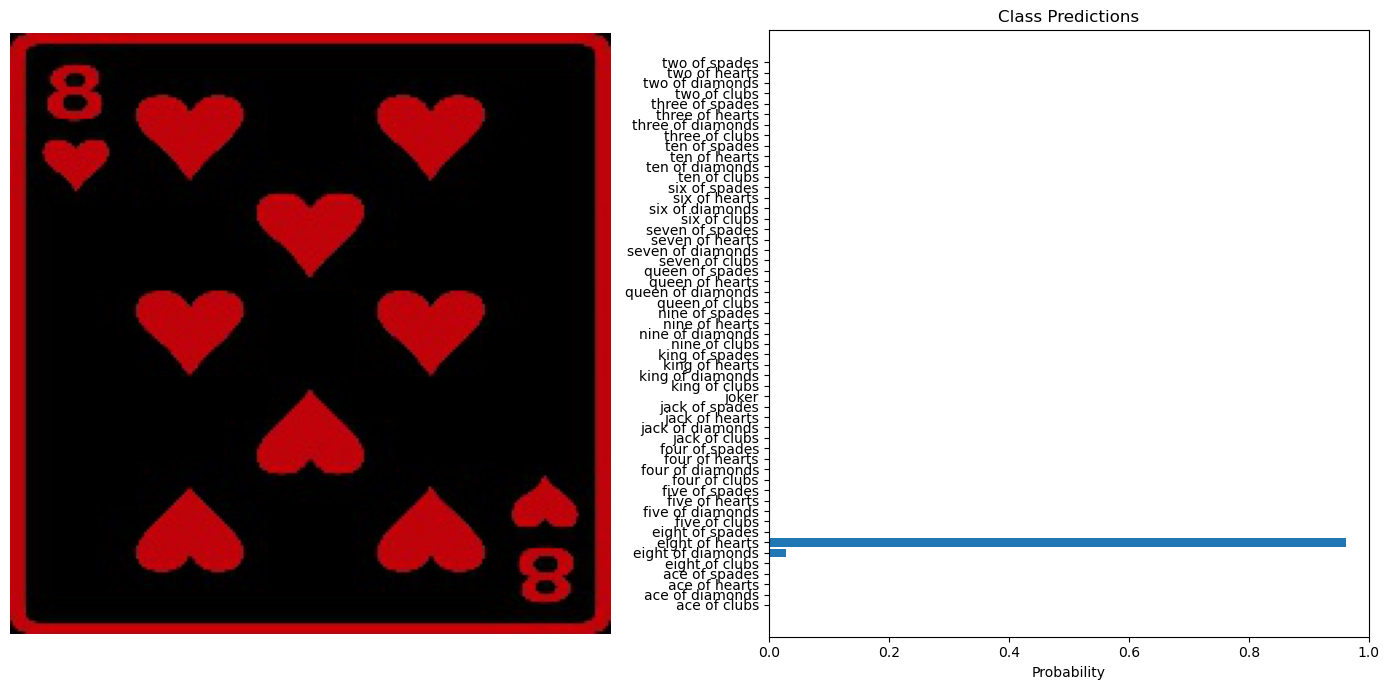

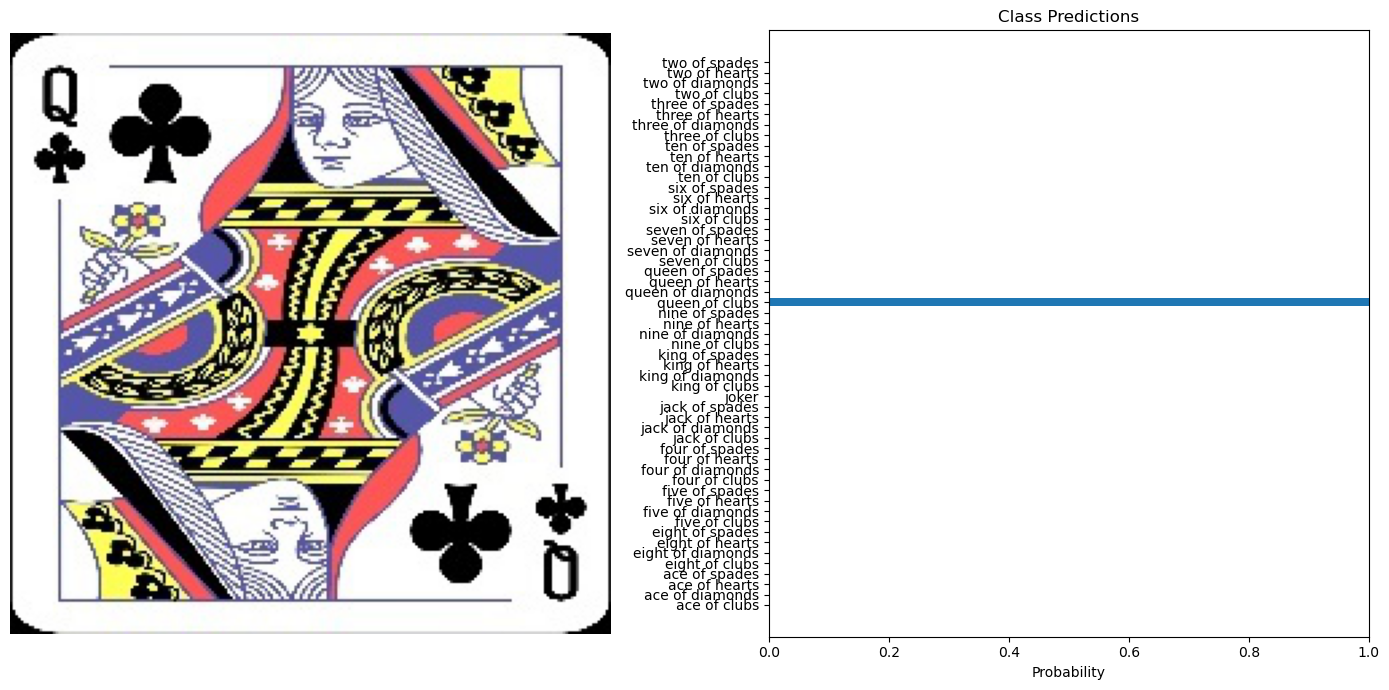

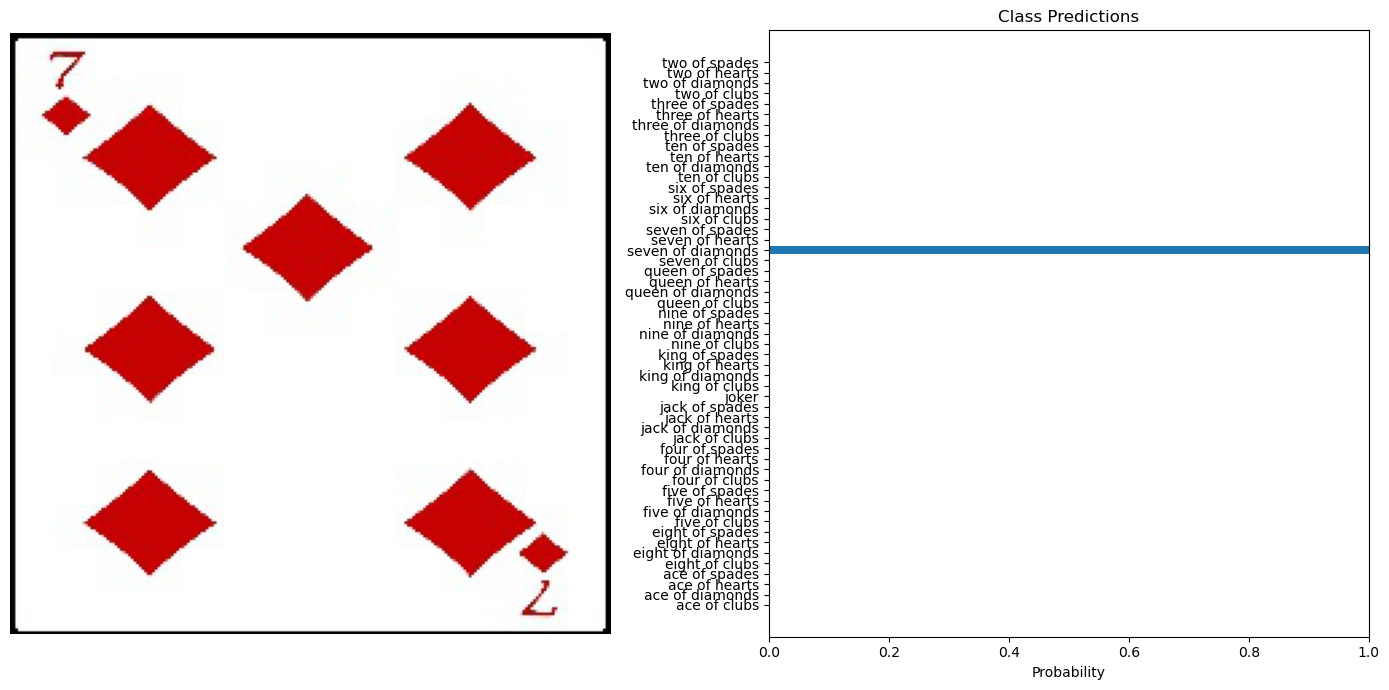

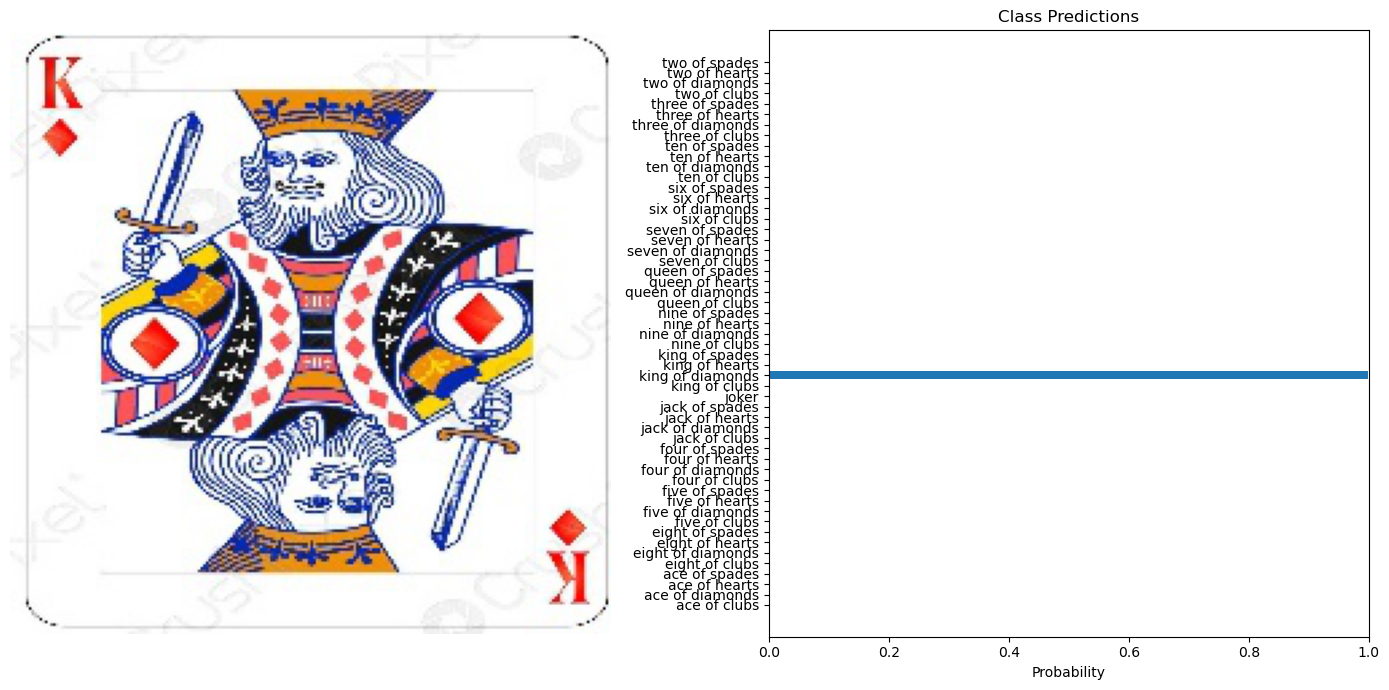

In [30]:
from glob import glob

test_images = glob("D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/playing card dataset/test/*/*")

examples = np.random.choice(test_images, 10)

for example in examples:
    original_image, image_tensor = preprocess_image(example, transform)
    prob = predict(model, image_tensor, device)
    visualize_predictions(original_image, prob, class_names)

## Accuracy on the Test Dataset

In [15]:
test_losses = []
test_correct = 0
test_total = 0

model.eval()
running_loss = 0.0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing Loop', disable=True):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Corrected 'output' to 'outputs'
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)

        # calculating accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    test_accuracy = (test_correct / test_total) * 100
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 3.9759, Test Accuracy: 1.89%


## Inception_ResnetV2

In [37]:
class InceptionResNetV2CardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(InceptionResNetV2CardClassifier, self).__init__()
        # Load Inception-ResNet-v2 pre-trained model
        self.base_model = timm.create_model('inception_resnet_v2', pretrained=True)
        
        # Freeze the base model parameters (optional, based on your testing preference)
        # for param in self.base_model.parameters():
        #     param.requires_grad = False

        # for name, param in self.base_model.named_parameters():
        #     if 'blocks.5' in name or 'block8' in name or 'conv2d_7b' in name or 'repeat_2' in name or 'mixed_7a' in name:
        #         param.requires_grad = True
            
        # Replace the classifier layer
        self.base_model.classif = nn.Linear(self.base_model.classif.in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

In [38]:
model = InceptionResNetV2CardClassifier(num_classes=53)
print(str(model)[:500])

InceptionResNetV2CardClassifier(
  (base_model): InceptionResnetV2(
    (conv2d_1a): ConvNormAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv2d_2a): ConvNormAct(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps


In [39]:
for name, param in model.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


base_model.conv2d_1a.conv.weight: requires_grad=True
base_model.conv2d_1a.bn.weight: requires_grad=True
base_model.conv2d_1a.bn.bias: requires_grad=True
base_model.conv2d_2a.conv.weight: requires_grad=True
base_model.conv2d_2a.bn.weight: requires_grad=True
base_model.conv2d_2a.bn.bias: requires_grad=True
base_model.conv2d_2b.conv.weight: requires_grad=True
base_model.conv2d_2b.bn.weight: requires_grad=True
base_model.conv2d_2b.bn.bias: requires_grad=True
base_model.conv2d_3b.conv.weight: requires_grad=True
base_model.conv2d_3b.bn.weight: requires_grad=True
base_model.conv2d_3b.bn.bias: requires_grad=True
base_model.conv2d_4a.conv.weight: requires_grad=True
base_model.conv2d_4a.bn.weight: requires_grad=True
base_model.conv2d_4a.bn.bias: requires_grad=True
base_model.mixed_5b.branch0.conv.weight: requires_grad=True
base_model.mixed_5b.branch0.bn.weight: requires_grad=True
base_model.mixed_5b.branch0.bn.bias: requires_grad=True
base_model.mixed_5b.branch1.0.conv.weight: requires_grad=True

In [40]:
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = InceptionResNetV2CardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
        
        val_loss = running_loss / len(valid_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

    
    

Validation loop: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]


Epoch 1/5 - Train loss: 1.487739276035385, Validation loss: 0.45118477209559027


Validation loop: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]


Epoch 2/5 - Train loss: 0.4784887337984844, Validation loss: 0.16133192608941277


Validation loop: 100%|██████████| 9/9 [00:01<00:00,  5.42it/s]


Epoch 3/5 - Train loss: 0.27803959609141254, Validation loss: 0.05755284571985029


Validation loop: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]


Epoch 4/5 - Train loss: 0.19262388489303908, Validation loss: 0.21944134662736137


Validation loop: 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]

Epoch 5/5 - Train loss: 0.15650814987820694, Validation loss: 0.11787438524781534


In [41]:
train_loss

0.15650814987820694

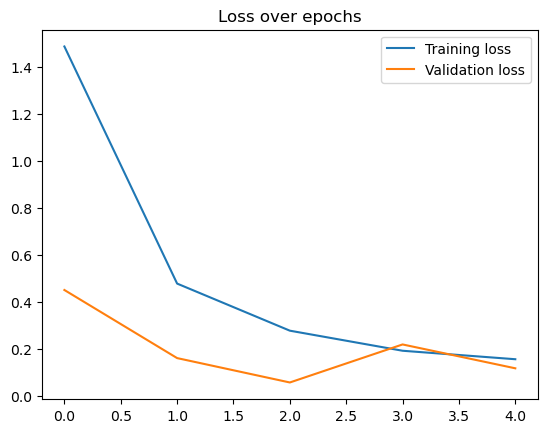

In [42]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [43]:
test_losses = []
test_correct = 0
test_total = 0

model.eval()
running_loss = 0.0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing Loop', disable=True):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Corrected 'output' to 'outputs'
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)

        # calculating accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    test_accuracy = (test_correct / test_total) * 100
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.0757, Test Accuracy: 98.11%


In [68]:
torch.save(model.state_dict(), "card_classifier_inception_resnet_v2.pth")

In [69]:
torch.save(model, "card_classifier_inception_resnet_v2_full.pth")

## NASNet - A

In [52]:
# List all available models in `timm` to confirm NASNet availability
import timm
print(timm.list_models('*nasnet*'))


['mnasnet_050', 'mnasnet_075', 'mnasnet_100', 'mnasnet_140', 'mnasnet_small', 'nasnetalarge', 'pnasnet5large', 'semnasnet_050', 'semnasnet_075', 'semnasnet_100', 'semnasnet_140', 'spnasnet_100']


In [62]:
class NASNetACardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(NASNetACardClassifier, self).__init__()
        
        # Load NASNet-A model from timm with pretrained weights
        self.base_model = timm.create_model('nasnetalarge', pretrained=True)
        
        # Freeze all layers initially (optional, adjust as needed)
        # for param in self.base_model.parameters():
        #     param.requires_grad = False
            
        # # Replace the classifier with a custom classifier
        nasnet_out_features = self.base_model.last_linear.in_features

        self.base_model.last_linear = nn.Sequential(
            nn.Linear(nasnet_out_features, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, x):
        x = self.base_model(x)
        return x

In [63]:
model_nasnet = NASNetACardClassifier(num_classes=53)
print(str(model_nasnet)[:500])

NASNetACardClassifier(
  (base_model): NASNetALarge(
    (conv0): ConvNormAct(
      (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNormAct2d(
        96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): Identity()
      )
    )
    (cell_stem_0): CellStem0(
      (conv_1x1): ActConvBn(
        (act): ReLU()
        (conv): Conv2d(96, 42, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): Bat


In [64]:
for name, param in model_nasnet.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


base_model.conv0.conv.weight: requires_grad=True
base_model.conv0.bn.weight: requires_grad=True
base_model.conv0.bn.bias: requires_grad=True
base_model.cell_stem_0.conv_1x1.conv.weight: requires_grad=True
base_model.cell_stem_0.conv_1x1.bn.weight: requires_grad=True
base_model.cell_stem_0.conv_1x1.bn.bias: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.separable_1.depthwise_conv2d.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.separable_1.pointwise_conv2d.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.bn_sep_1.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.bn_sep_1.bias: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.separable_2.depthwise_conv2d.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.separable_2.pointwise_conv2d.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.bn_sep_2.weight: requires_grad=True
base_model.cell_stem_0.comb_iter_0_left.bn_sep_2.bias: requires

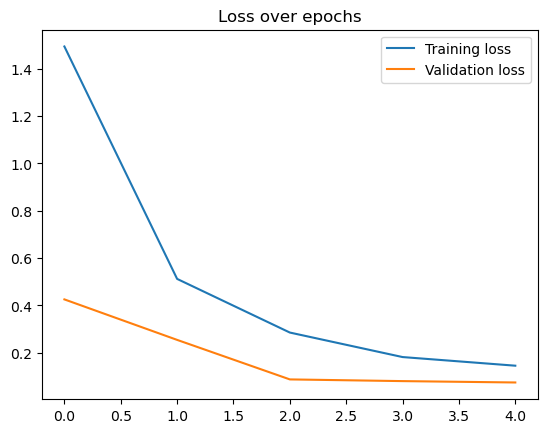

In [66]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [67]:
test_losses = []
test_correct = 0
test_total = 0

model_nasnet.eval()
running_loss = 0.0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing Loop', disable=True):
        images, labels = images.to(device), labels.to(device)

        outputs = model_nasnet(images)  # Corrected 'output' to 'outputs'
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)

        # calculating accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    test_accuracy = (test_correct / test_total) * 100
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.1772, Test Accuracy: 94.72%


In [65]:
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_nasnet = InceptionResNetV2CardClassifier(num_classes=53)
model_nasnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_nasnet.parameters(), lr=0.001)


for epoch in range(num_epochs):
    model_nasnet.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_nasnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model_nasnet.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)

            outputs = model_nasnet(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
        
        val_loss = running_loss / len(valid_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

    
    

Validation loop: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 1/5 - Train loss: 1.4936812521278044, Validation loss: 0.42560615179673683


Validation loop: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


Epoch 2/5 - Train loss: 0.5121505336146039, Validation loss: 0.2546037660454804


Validation loop: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


Epoch 3/5 - Train loss: 0.2855813447288301, Validation loss: 0.0876934494612352


Validation loop: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


Epoch 4/5 - Train loss: 0.18208543240148398, Validation loss: 0.08050829301465233


Validation loop: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

Epoch 5/5 - Train loss: 0.1456221762227612, Validation loss: 0.07474058354800601


In [70]:
torch.save(model_nasnet.state_dict(), "card_classifier_nasnet.pth")

In [71]:
torch.save(model_nasnet, "card_classifier_nasnet_full.pth")

In [72]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()




In [86]:
test_image = "D:/STUDY/MS/DATS 6450 Computer Vision/playing_cards_classifier_pyTorch/card2.jpg"

original_image, image_tensor = preprocess_image(test_image, transform)
prob = predict(model, image_tensor, device)

In [84]:
image_tensor

tensor([[[[0.0549, 0.0039, 0.0039,  ..., 0.6784, 0.6824, 0.6627],
          [0.0549, 0.0039, 0.0039,  ..., 0.6745, 0.6706, 0.6627],
          [0.0549, 0.0039, 0.0039,  ..., 0.6902, 0.6706, 0.6745],
          ...,
          [0.0549, 0.0039, 0.0078,  ..., 0.0235, 0.0235, 0.0196],
          [0.0627, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157],
          [0.0627, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157]],

         [[0.0549, 0.0039, 0.0039,  ..., 0.5686, 0.5725, 0.5529],
          [0.0549, 0.0039, 0.0039,  ..., 0.5647, 0.5608, 0.5529],
          [0.0549, 0.0039, 0.0039,  ..., 0.5843, 0.5647, 0.5686],
          ...,
          [0.0549, 0.0039, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
          [0.0588, 0.0078, 0.0078,  ..., 0.0039, 0.0078, 0.0078],
          [0.0588, 0.0078, 0.0078,  ..., 0.0039, 0.0078, 0.0078]],

         [[0.0549, 0.0039, 0.0039,  ..., 0.4745, 0.4784, 0.4588],
          [0.0549, 0.0039, 0.0039,  ..., 0.4706, 0.4667, 0.4588],
          [0.0549, 0.0039, 0.0039,  ..., 0

In [77]:
prob

array([0.00583861, 0.01075145, 0.02806419, 0.01052344, 0.00706962,
       0.0095177 , 0.017192  , 0.00772634, 0.00494665, 0.00605086,
       0.03218776, 0.00565044, 0.00358954, 0.01101431, 0.01481327,
       0.00490702, 0.01079003, 0.02266726, 0.02882649, 0.01146791,
       0.10559701, 0.00414893, 0.01053823, 0.03414199, 0.01342444,
       0.00152692, 0.00452732, 0.00925366, 0.00536292, 0.04340496,
       0.13834132, 0.07718378, 0.04801379, 0.00341019, 0.00658391,
       0.00671726, 0.00181646, 0.00436285, 0.00836679, 0.00440284,
       0.00641322, 0.0161723 , 0.02682601, 0.01951121, 0.00806317,
       0.00605725, 0.02024493, 0.00579595, 0.00502976, 0.00553592,
       0.0548353 , 0.02262139, 0.01817314], dtype=float32)

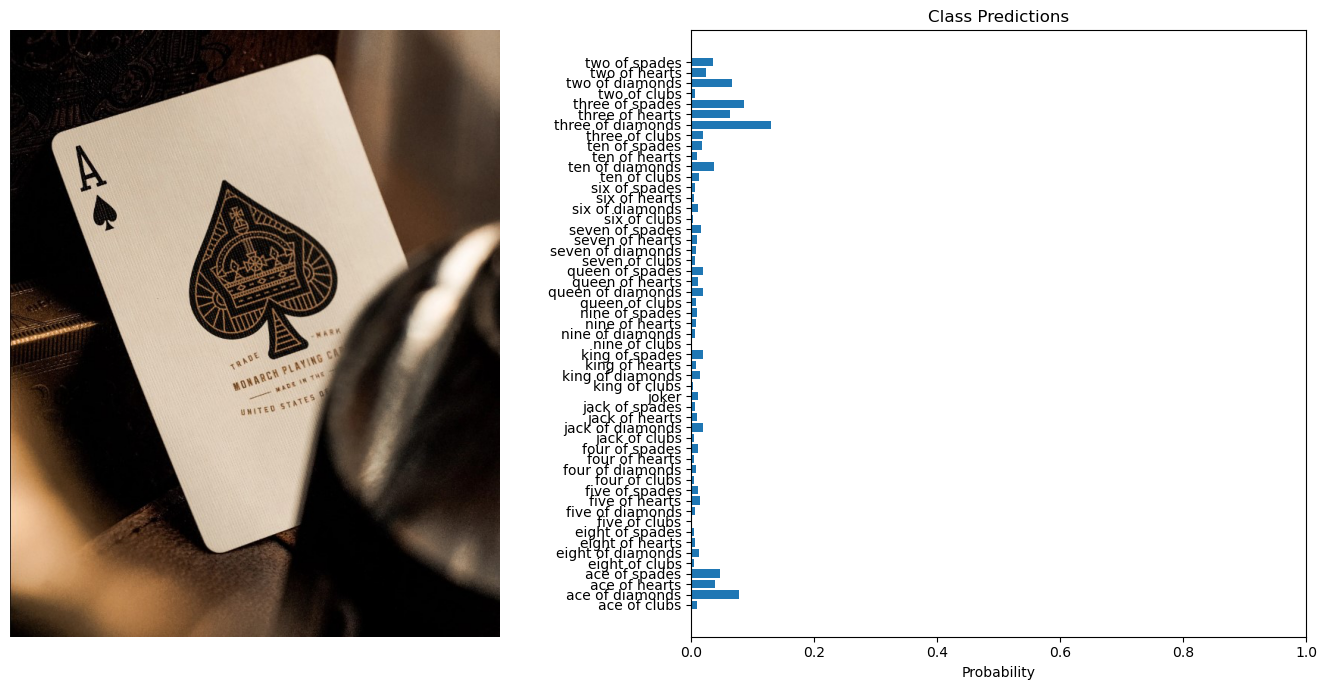

In [87]:
class_names = dataset.classes

visualize_predictions(original_image, prob, class_names)